In [2]:
#import library to read csv file
import pandas as pd

#import library to make wordcloud   
from wordcloud import WordCloud, STOPWORDS  
import matplotlib.pyplot as plt     
%matplotlib inline

In [4]:
df = pd.read_csv("https://rosyid.sgp1.digitaloceanspaces.com/DisneylandReviews.csv",encoding='latin-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
text = " ".join(review for review in df.Review_Text)

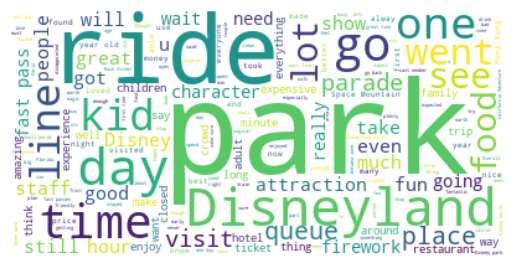

In [8]:
#create word cloud from text 
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
#show wordcloud 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot: xlabel='Branch'>

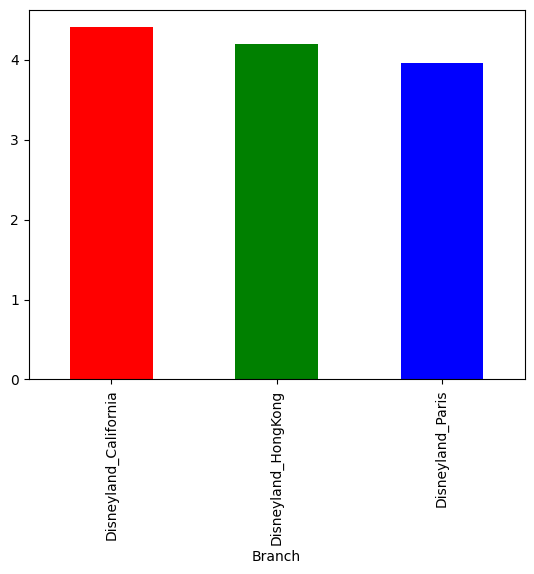

In [11]:
#count average rating for each branch
df.groupby('Branch').Rating.mean()

#show average rating for each branch in bar chart different color
df.groupby('Branch').Rating.mean().plot(kind='bar',color=['red','green','blue'])

<AxesSubplot: ylabel='Reviewer_Location'>

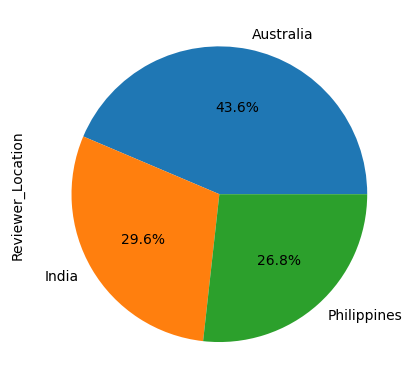

In [41]:
#show top 3 Reviewer_Location for Disneyland_HongKong in pie chart
df[df.Branch=='Disneyland_HongKong'].Reviewer_Location.value_counts().head(3).plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot: ylabel='Reviewer_Location'>

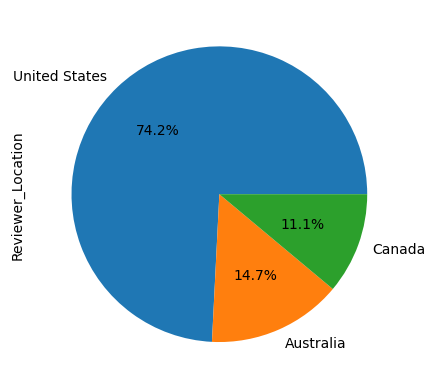

In [19]:
#show top 3 Reviewer_Location for Disneyland_California in pie chart
df[df.Branch=='Disneyland_California'].Reviewer_Location.value_counts().head(3).plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot: ylabel='Reviewer_Location'>

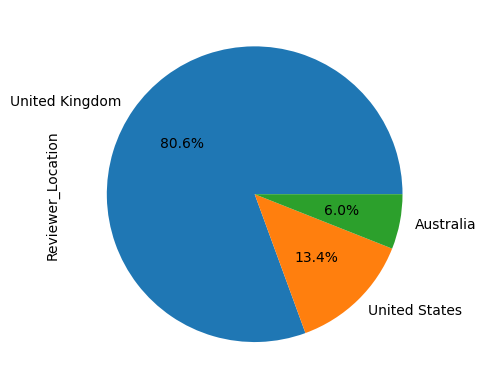

In [20]:
#show top 3 Reviewer_Location for Disneyland_Paris in pie chart
df[df.Branch=='Disneyland_Paris'].Reviewer_Location.value_counts().head(3).plot(kind='pie',autopct='%1.1f%%')

Sentiment Analysis

In [21]:
reviews = df.Review_Text

In [25]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity
def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']

def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [26]:
df['tb_polarity'] = df.Review_Text.apply(detect_tb_polarity)
df['tb_subjectivity'] = df.Review_Text.apply(detect_tb_subjectivity)

vader = SentimentIntensityAnalyzer()
df['vader_pos'] = df.Review_Text.apply(detect_vader_pos)
df['vader_neg'] = df.Review_Text.apply(detect_vader_neg)
df['vader_comp'] = df.Review_Text.apply(detect_vader_comp)

In [28]:
#assign sentiment based on compound score
df['sentiment'] = ""
for y in range(0,len(df)):
    if df['vader_comp'][y] >= 0.05:
        df['sentiment'][y] = 'positive'
    else:
        df['sentiment'][y] = 'negative' 

C:\Users\Krisna Sirait\AppData\Local\Temp\ipykernel_20648\3882705102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][y] = 'positive'
C:\Users\Krisna Sirait\AppData\Local\Temp\ipykernel_20648\3882705102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][y] = 'negative'


In [29]:
df['sentiment'].value_counts()

positive    37785
negative     4871
Name: sentiment, dtype: int64

In [33]:
df = df[df['Year_Month'] != "missing"]
df['year'] = pd.DatetimeIndex(df['Year_Month']).year
#type(ca_1['year'])

df['year'] = pd.to_numeric(df['year'])
df.head(10)

C:\Users\Krisna Sirait\AppData\Local\Temp\ipykernel_20648\1171347007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['Year_Month']).year
C:\Users\Krisna Sirait\AppData\Local\Temp\ipykernel_20648\1171347007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_numeric(df['year'])


,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment,year
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.243981,0.561481,0.109,0.000,0.7069,positive,2019
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.236131,0.434649,0.195,0.044,0.9853,positive,2019
2,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.160498,0.422944,0.220,0.022,0.9920,positive,2019
3,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.189286,0.512143,0.154,0.078,0.8425,positive,2019
4,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.266667,0.437500,0.098,0.000,0.2846,positive,2019
5,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong,-0.065476,0.610397,0.154,0.088,0.9311,positive,2019
6,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong,0.185000,0.590000,0.220,0.087,0.7489,positive,2019
7,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong,0.054722,0.500556,0.109,0.030,0.8345,positive,2019
8,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong,-0.067284,0.482099,0.095,0.074,0.5195,positive,2019
9,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong,0.204497,0.394974,0.152,0.041,0.9434,positive,2019


In [34]:
# labeling the data
rating = df["vader_comp"]
def label_func(rating):
    if rating >=0.05:
        return "Positive"
    elif (rating >=0.4) & (rating <= 0.65):
            return "Neutral"
    else:
        return "Negative"
        
df["Sentiment"] = df["vader_comp"].apply(lambda x: label_func(x))   

C:\Users\Krisna Sirait\AppData\Local\Temp\ipykernel_20648\2344997047.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"] = df["vader_comp"].apply(lambda x: label_func(x))


In [35]:
df.head(2)

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment,year,Sentiment
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.243981,0.561481,0.109,0.000,0.7069,positive,2019,Positive
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.236131,0.434649,0.195,0.044,0.9853,positive,2019,Positive


<AxesSubplot: ylabel='Sentiment'>

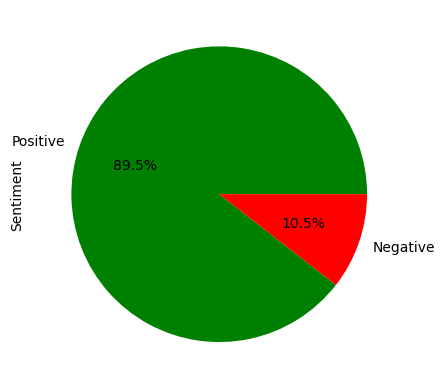

In [38]:
#show sentiment for DisneyLand_California branch in pie chart different color
df[df.Branch=='Disneyland_California'].Sentiment.value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['green','red','blue'])

<AxesSubplot: ylabel='Sentiment'>

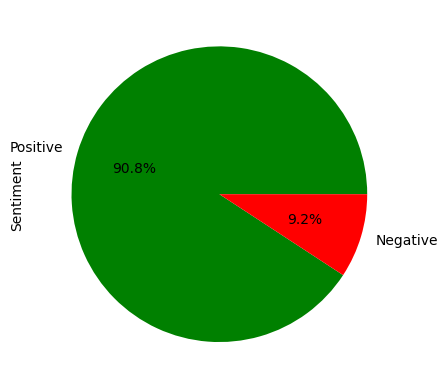

In [39]:
#show sentiment for DisneyLand_HongKong branch in pie chart different color
df[df.Branch=='Disneyland_HongKong'].Sentiment.value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['green','red','blue'])

<AxesSubplot: ylabel='Sentiment'>

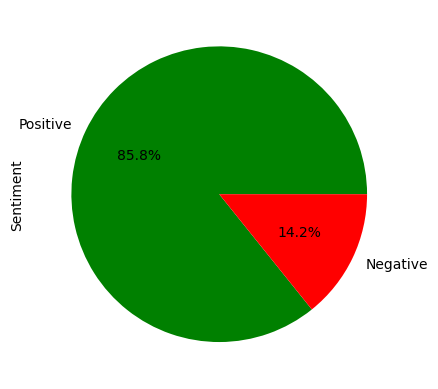

In [40]:
#show sentiment for DisneyLand_Paris branch in pie chart different color
df[df.Branch=='Disneyland_Paris'].Sentiment.value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['green','red','blue'])